# Guided Project: Predicting Car Prices with the KNN Algorithm
***
## Motivation
In this guided project, we will explore the fundamentals of Machine Learning (ML) using the k-nearest neighbours (KNN) algorithm to predict a car's market price. We will test the performance of the trained model with holdout and k-fold validation. 

## Description

In this project, we will be working with the data set that contains information on various cars. We have information about each vehicle's technical aspects, such as the motor's displacement, the car's weight, the miles per gallon, how fast the vehicle accelerates, etc. You can read more about the data set  <a href='https://archive.ics.uci.edu/ml/datasets/automobile'>here</a> or download it directly from <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'>here</a>. 

Below we can see a short description of the data set's columns.  

__Attribute Information__:

1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized-losses`: continuous from 65 to 256.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.

## Outcomes
In this project:
- We __analysed and cleaned a dataset__ containing information on 205 cars;
- We __trained and tested a univariate KNN model__ with various input features __to predict the target column__ `price`.
- Based on the RMSE values from the univariate KNN model, we __selected the most informative input features and fed them into a multivariate KNN model__;
- We __trained and tested a multivariate KNN model with various values of the hyperparameter__ `k` __and different validation approaches__ (holdout and k-fold validation).


## Reading in data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data',names=cols)
pd.options.display.max_columns = 30

cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
best_variables = ['engine-size', 'highway-mpg', 'curb-weight', 'city-mpg', 'width', 'horsepower']
cars['highway-mpg'].value_counts().sort_index(ascending=False)

54     1
53     1
50     1
47     2
46     2
43     4
42     3
41     3
39     2
38    17
37    13
36     2
34    14
33     9
32    16
31     8
30    16
29    10
28    13
27     5
26     3
25    19
24    17
23     7
22     8
20     2
19     2
18     2
17     1
16     2
Name: highway-mpg, dtype: int64

## Data Cleaning
The table above shows that some of the columns that ought to be numerical belong to the Pandas object type. Moreover, the first three rows in the `normalized-losses` column have missing values expressed with a char `?`. Therefore, we can assume that the rest of the columns that should be supposedly numerical have missing values. 

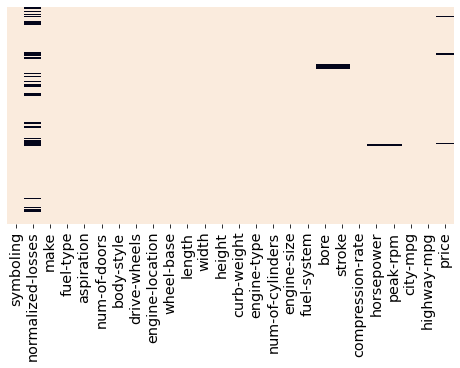

In [4]:
# group columns that will be cleaned and converted to numbers
cols_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

# replace chars with null values
for col in cols_to_convert:
    cars[col] = cars[col].replace('?', np.nan)

# convert string values to numbers  
cars[cols_to_convert] = cars[cols_to_convert].astype('float')


# write a function to visualise missing values in the dataframe
def plot_null_matrix(df, figsize=(8,4)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_null_matrix(cars)

The initial assumption about missing values has been valid. The graph above shows that most of the missing values are in the `normalised-losses` column. As we will use the data to predict a car price, we will __drop all the rows with missing values in the__ `price` __column__. We will also __replace missing values__ in the rest of the numeric columns __with a corresponding column's mean value__. Finally, we will __select all the numeric columns__ (except for a target column) __and normalise them to range from 0 to 1__.

In [5]:
# drop rows with missing values
cars['price'] = cars['price'].dropna(axis=0)

# replace missing values with estimated ones
for col in cols_to_convert:
    mean_val = cars[col].mean()
    cars[col] = cars[col].fillna(mean_val)
    
cars[cols_to_convert].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
price                0
dtype: int64

In [6]:
# select numeric columns except for the target column
numeric_cols = cars.select_dtypes(exclude=['object']).columns.tolist()

numeric_cols.remove('price')

normalised_cars = cars[numeric_cols].copy()

# normalise values to range from 0 to 1 except the target column.
normalised_cars[numeric_cols] = (normalised_cars[numeric_cols] - normalised_cars[numeric_cols].min()) / (normalised_cars[numeric_cols].max() - normalised_cars[numeric_cols].min())
normalised_cars['price'] = cars['price']

Before building and tuning a prediction model, it can be prudent to briefly analyse data in the target column `price`. For this task, we will build a histogram showing how the values in this column are distributed. 

In [19]:
import plotly.graph_objects as go

# build a histogram on the target column 'price'
fig = px.histogram(normalised_cars, x="price", marginal="rug", 
                   title ='Distribution of the values in the `price` column')
fig.add_shape(type="line",x0=normalised_cars['price'].mean(), x1=normalised_cars['price'].mean(), y0=0, 
              y1=55, line = dict(color = 'red', dash = 'dash'))
fig.add_shape(type="line",x0=normalised_cars['price'].median(), x1=normalised_cars['price'].median(), y0=0, 
              y1=55, line = dict(color = 'red', dash = 'dash'))

fig.add_trace(go.Scatter(
    x=[normalised_cars['price'].median(), normalised_cars['price'].mean()], y=[41, 30],
    text=["Median price","Mean price"],
    mode="text",
))

fig.show()

The graph shows that __the distribution of values in the target column 'price' is considerbaly skewed to right__. The tail region on the graph is likely to act as an outlier for the statistical model and thus adversely affect the model’s performance.  

## Univariate K-Nearest Neighbours Model
### Holdout validation
Before training more complex multivariate models, __we will start with a simple univariate model__ to structure the code workflow and better understand the features. Therefore, we will create a function `knn_train_test()` that will encapsulate the training and simple validation process. This function will have four parameters – training column name, target column name, the dataframe object, and a number of the nearest neighbours to consider. We will use this function to train and test univariate models using various numeric columns and the number of nearest neighbours. __To make the performance of different univariate models comparable, the function will return the root-mean-square error (RMSE).__

In this part of the project, we will split the dataset into two equal parts for training and testing. __5-fold cross-validation will be performed in the second part of the project__. 

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

def knn_train_test(train_col, target_col, df_original, k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    
    df = df_original.copy()
        
    # shuffle rows in the dataframe
    df = shuffle(df)
    
    # divide number of rows in half and round
    last_train_row = int(len(df) / 2)
    train_df = df.iloc[:last_train_row]
    test_df = df.iloc[last_train_row:]
    # list-like object, containing a column of interest from training set
    train_features = train_df[[train_col]]
    # list-like object, containing just the target `price` column
    train_target = train_df[target_col]
    # feed data into the model
    knn.fit(train_features, train_target)
    # make predictions
    predictions = knn.predict(test_df[[train_col]])
    
    return (mean_squared_error(test_df[target_col],predictions)) ** .5

# create an empty dictionary to save RMSE values for each variable
rmse_results = {}

# train and test model on each variable with varying number of k 
for col in numeric_cols:
    rmses = []
    for k in range(1,10):
        rmse = knn_train_test(col, 'price', normalised_cars, k)
        rmses.append(rmse)
    rmse_results[col] = rmses

err_metrics = pd.DataFrame(data=rmse_results)
err_metrics['k'] = list(range(1,10))

# generate a graph to display RMSE values for each variable
fig = px.line(err_metrics, x='k', y=err_metrics.columns,
             labels = {'k':'Number of nearest neigbours (k)',
                       'value':'Root-mean-square error (RMSE)'},
             title = 'Perfomance of Univariate KNN Models')

fig.update_layout(yaxis_tickformat = '')
fig.show()

The graph above demonstrates that __increasing the number of nearest neighbours__ `k` in most cases __does not improve the model's accuracy__. Nevertheless, some of the features have a relatively low value of RMSE (e.g., `engine-size`, `highway-mpg`, `curb-weight`, `city-mpg`, `width`, `horsepower`). These features will be of our primary interest, as they may have the biggest impact on price compared to the other features in the data set. 

However, before fitting the selected features into a multivariate KNN model, it may be worth looking at them more carefully. Some of them may have outliers that are likely to affect the model's accuracy. __Let's map each variable of our interest on a scatter plot to see its relationship with the target column__ `price`.

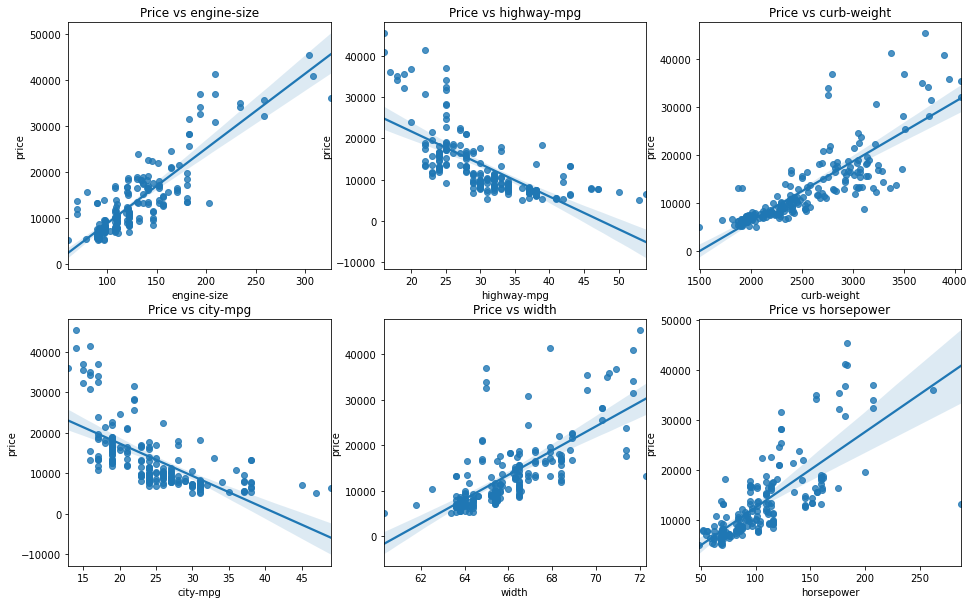

In [9]:
best_variables = ['engine-size', 'highway-mpg', 'curb-weight', 'city-mpg', 'width', 'horsepower']

fig = plt.figure(figsize = (16,10))
for n in range(1,7):
    axis = "ax{}".format(n)
    axis = fig.add_subplot(2,3,n)
    sns.regplot(x = best_variables[n-1] , y = 'price', data = cars)
    plt.title('Price vs '+ best_variables[n-1])
plt.show()

As we can see, __all the variables have some values that stray considerably from the trendline__. However, __most of the outliers appear in groups or clusters__. Therefore, it is unlikely that all the outliers that can be assigned to some contingent group result from some error.

Nevertheless, there is a clear outlier in the `horsepower` column. Let's figure out if it is a case of some real data corruption. 

In [10]:
cars[cars['horsepower'] > 250]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.000000
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,13207.129353


As we can see, it is a Porsche car. Interestingly, __the other car with similar horsepower costs almost__ `three`  __times as much as the Porsche car__. To be more objective, let's compare its price with the other Porsche cars in the dataset.

In [11]:
cars[cars['make'] == 'porsche']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018.000000
126,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.000000
127,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.000000
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.000000
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,13207.129353


In [12]:
mask = (cars['make'] == 'porsche') & (cars['price'] > 15000)
mean_price_porsche = cars[mask]['price'].mean()
print("Average price for a Porsche car in the dataset: ",mean_price_porsche)

Average price for a Porsche car in the dataset:  31400.5


It is obvious now that __the car is undervalued__. If the dataset had had additional data on each car's age and run, it would have been far simpler to determine the real reason for such a low price of this particular vehicle. Let's see how this car's price differs from the average price for a vehicle in our dataset.

In [13]:
print("Average price for a car in the dataset: ",cars['price'].mean())

Average price for a car in the dataset:  13207.129353233831


Surprisingly, __it is the same as the price of the Porsche vehicle__. Therefore, we can conclude that __the current value does not reflect its actual cost and was supposedly imputed__. Let's check if there are any other values on the `price` column that equal its mean value. 

In [14]:
cars[cars['price'] == cars['price'].mean()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,13207.129353
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,13207.129353
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,13207.129353


We can see that there are `4` rows of data with the imputed value in the target column. We will drop these rows.

In [15]:
normalised_cars.drop(axis = 0, index = [9,44,45,129], inplace = True)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

def knn_train_test(train_col, target_col, df_original, k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    
    df = df_original.copy()
        
    # shuffle rows in the dataframe
    df = shuffle(df)
    
    # divide number of rows in half and round
    last_train_row = int(len(df) / 2)
    train_df = df.iloc[:last_train_row]
    test_df = df.iloc[last_train_row:]
    # list-like object, containing a column of interest from training set
    train_features = train_df[[train_col]]
    # list-like object, containing just the target `price` column
    train_target = train_df[target_col]
    # feed data into the model
    knn.fit(train_features, train_target)
    # make predictions
    predictions = knn.predict(test_df[[train_col]])
    
    return (mean_squared_error(test_df[target_col],predictions)) ** .5

# create an empty dictionary to save RMSE values for each variable
rmse_results = {}

# train and test model on each variable with varying number of k 
for col in numeric_cols:
    rmses = []
    for k in range(1,10):
        rmse = knn_train_test(col, 'price', normalised_cars, k)
        rmses.append(rmse)
    rmse_results[col] = rmses

err_metrics = pd.DataFrame(data=rmse_results)
err_metrics['k'] = list(range(1,10))

# generate a graph to display RMSE values for each variable
fig = px.line(err_metrics, x='k', y=err_metrics.columns,
             labels = {'k':'Number of nearest neigbours (k)',
                       'value':'Root-mean-square error (RMSE)'},
             title = 'Perfomance of Univariate KNN Models (updated)')

fig.update_layout(yaxis_tickformat = '')
fig.show()

## Multivariate K-Nearest Neighbours Model
### Holdout validation
In this part of the project, __we will train and test multivariate k-nearest neighbours models with a varying number of input variables__ – `2`, `3`, `4`, `5`. The value of `k` in all trials will be constant and equal `5`. __The list of input features will only include the top__ `5` __variables with the lowest level of RMSE__ shown in the univariate KNN model.

In [17]:
def multi_knn_train_test(train_col, target_col, df_original, k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    
    df = df_original.copy()
        
    # shuffle rows in the dataframe
    df = shuffle(df)
    
    # divide number of rows in half and round
    last_train_row = int(len(df) / 2)
    train_df = df.iloc[:last_train_row]
    test_df = df.iloc[last_train_row:]
    # list-like object, containing a column of interest from training set
    train_features = train_df[train_col]
    # list-like object, containing just the target `price` column
    train_target = train_df[target_col]
    # feed data into the model
    knn.fit(train_features, train_target)
    # make predictions
    predictions = knn.predict(test_df[train_col])
    
    return (mean_squared_error(test_df[target_col],predictions)) ** .5

# save top 5 variables with the lowest value of RMSE in univariate KNN model
best_variables = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']

# create a dictionary to save RMSE values for each variable
rmse_results = {}

# train and test model with varying number of variables  
for n in range(2,6):
    rmses = []
    for k in range(1,10):
        rmse = multi_knn_train_test(best_variables[:n], 'price', normalised_cars, k)
        rmses.append(rmse)
    rmse_results[n] = rmses

err_metrics = pd.DataFrame(data=rmse_results)
err_metrics['k'] = list(range(1,10))

# generate a graph to display RMSE values for each variable
fig = px.line(err_metrics, x='k', y=err_metrics.columns,
             labels = {'k':'Number of nearest neigbours (k)',
                       'value':'Root-mean-square error (RMSE)',
                       'variable':'number of variables'},
             title = 'Perfomance of Univariate KNN Models (updated) <br>Holdout validation')

fig.update_layout(yaxis_tickformat = '')
fig.show()

As we can see from above, __the most accurate model is the one trained with only__ `2` __input features__ –`engine-size` and `horsepower`. Let's train the model with 5-fold validation and see how it perfoms. This time the hyperparameter `k` will vary from 1 to 9. 
### 5-fold validation
As we deal with a limited data sample, we will be using `5`-fold validation. In general, `k`-fold validation may result in a less biased or less optimistic estimate of the model.

In [18]:
from sklearn.model_selection import cross_val_score, KFold

def multi_knn_train_test_2(train_col, target_col, df_original, k):
    kf = KFold(5, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor(n_neighbors = k)
    
    df = df_original.copy()
        
    mses = cross_val_score(knn, df[train_col], df['price'], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(abs(mses) ** .5)
   
    return avg_rmse

# create an empty dictionary to save RMSE values for each variable
rmse_results = {}
n_features = [2, 4, 5]

for n in range(2,6):
    rmses = []
    for k in range(1,10):
        rmse = multi_knn_train_test_2(best_variables[:n], 'price', normalised_cars, k)
        rmses.append(rmse)
    rmse_results[n] = rmses

err_metrics = pd.DataFrame(data=rmse_results)
err_metrics['k'] = list(range(1,10))

# generate a graph to display 
fig = px.line(err_metrics, x='k', y=err_metrics.columns,
             labels = {'k':'Number of nearest neigbours (k)',
                       'value':'Root-mean-square error (RMSE)',
                       'variable':'number of variables'},
             title = 'Perfomance of Univariate KNN Models <br>5-fold validation')

fig.update_layout(yaxis_tickformat = '')
fig.show()

The graph above shows that training the model with __5-validation has made it slightly more accurate__. When hyperparameter `k` equals `2`, the model yields almost the same result irrespective of the number of input features. Interestingly, the model's predictions are the most accurate if `k` equals one and the input features are `engine-size` and `horsepower`.